# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING DATASET

In [3]:
data = pd.read_csv("Facebook_Ads_2.csv",encoding='ISO-8859-1')

In [4]:
data.shape

(499, 6)

In [5]:
data.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [6]:
data.isna().sum()

Names                 0
emails                0
Country               0
Time Spent on Site    0
Salary                0
Clicked               0
dtype: int64

In [7]:
data.describe()

,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
Names                 499 non-null object
emails                499 non-null object
Country               499 non-null object
Time Spent on Site    499 non-null float64
Salary                499 non-null float64
Clicked               499 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


# VISUALIZING DATA

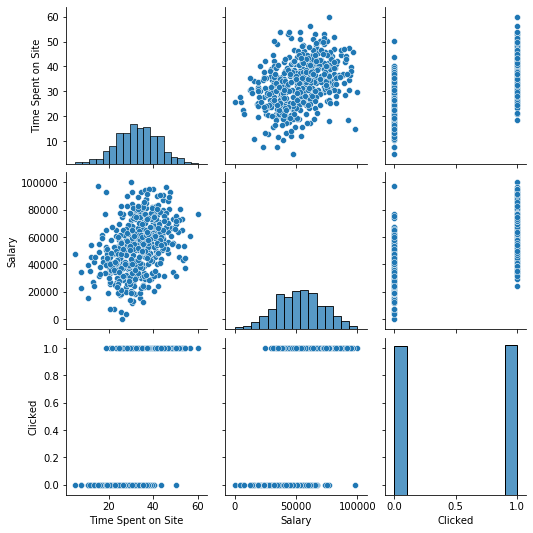

In [9]:
sns.pairplot(data)

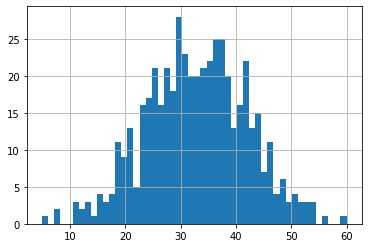

In [11]:
data['Time Spent on Site'].hist(bins=50)

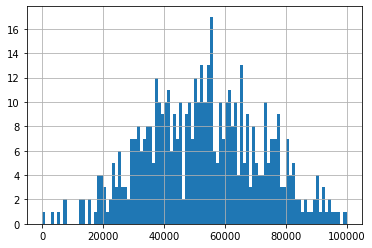

In [12]:
data['Salary'].hist(bins=100)

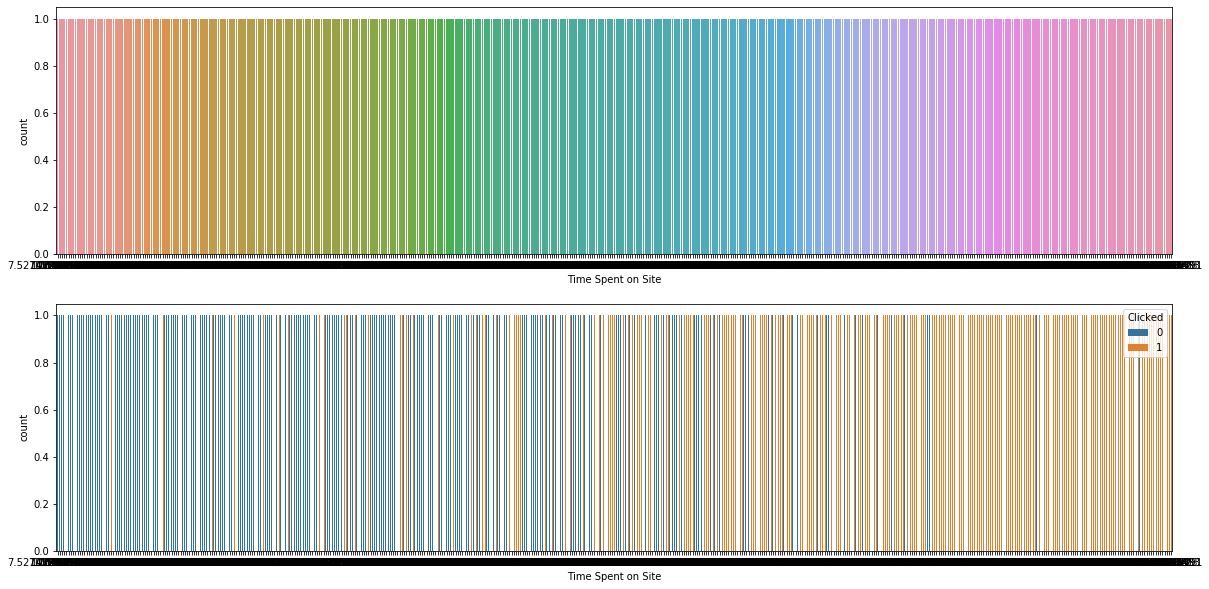

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.countplot(x='Time Spent on Site', data=data)
plt.subplot(212)
sns.countplot(x='Time Spent on Site', hue='Clicked', data=data)

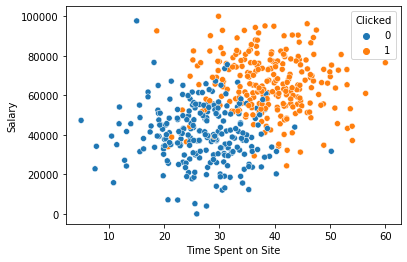

In [16]:
sns.scatterplot(x='Time Spent on Site', y = 'Salary', hue='Clicked', data=data)

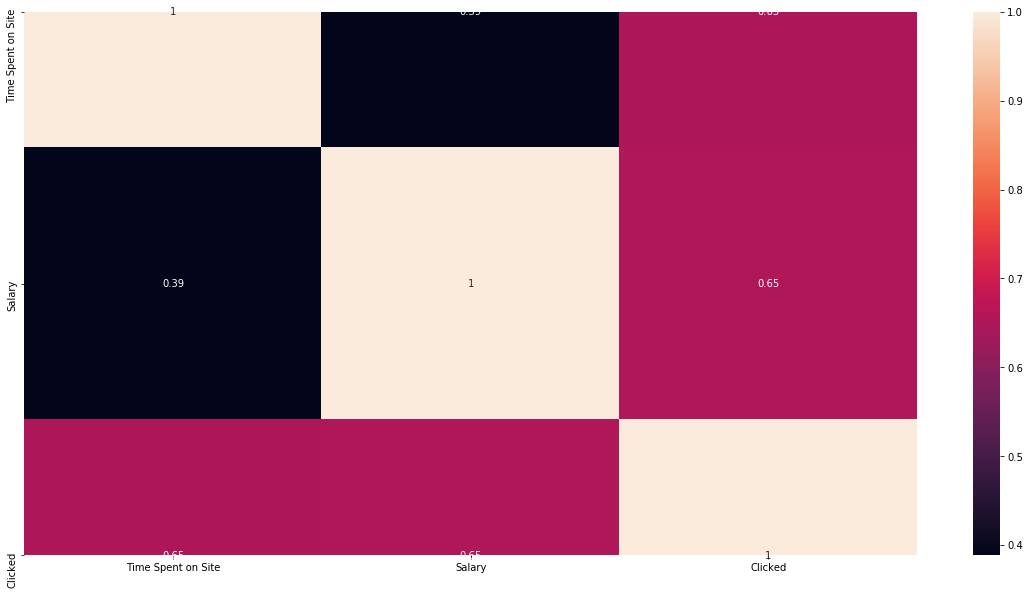

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot = True)

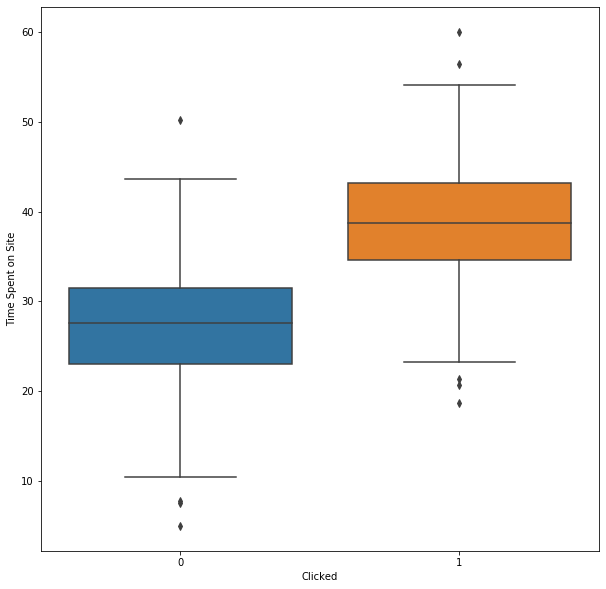

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Clicked',y='Time Spent on Site', data=data)

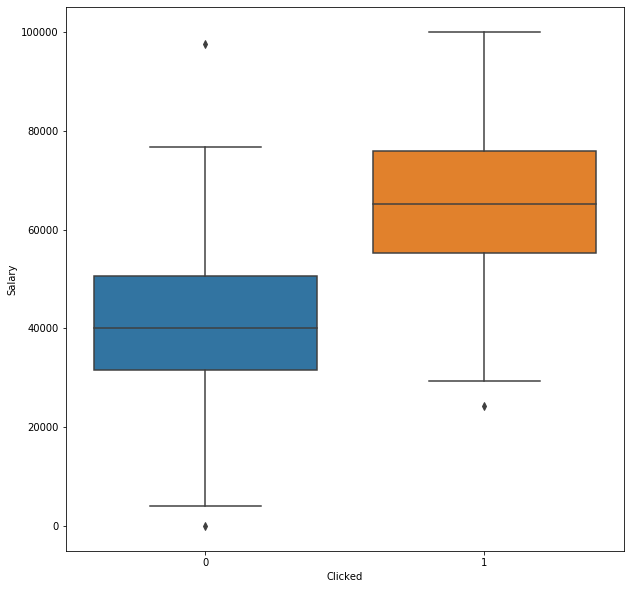

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Clicked',y='Salary', data=data)

# PREPARE THE DATA FOR TRAINING

In [22]:
data

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


In [26]:
categorical = data[['Names','emails','Country']]

In [27]:
categorical

,Names,emails,Country
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil
...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe
495,Walter,ligula@Cumsociis.ca,Nepal
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe
497,Pearl,penatibus.et@massanonante.com,Philippines


In [30]:
train_data = data.drop(['Names','emails','Country'], axis=1)

In [31]:
train_data

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0
...,...,...,...
494,19.222746,44969.13495,0
495,22.665662,41686.20425,0
496,35.320239,23989.80864,0
497,26.539170,31708.57054,0


In [207]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data[['Time Spent on Site','Salary']], train_data['Clicked'], test_size=0.25,random_state=48)

In [208]:
X_train.shape

(374, 2)

In [209]:
y_train.shape

(374,)

In [210]:
X_test.shape

(125, 2)

In [211]:
y_test.shape

(125,)

# TRAINING THE MODEL

In [241]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, C=0.1, penalty = 'l2')

In [242]:
lr.fit(X_train,y_train)

LogisticRegression(C=0.1, random_state=0)

In [243]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# TESTING AND EVALUATING MODEL

In [244]:
y_pred = lr.predict(X_test)

In [245]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)


In [246]:
print(cm)

[[64  4]
 [ 4 53]]


In [247]:
accuracy_score(y_test,y_pred)


0.936

In [248]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.93      0.93      0.93        57

    accuracy                           0.94       125
   macro avg       0.94      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125



# RANDOM FOREST CLASSIFIER

In [297]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators = 1000, criterion = 'entropy',max_depth=100)

In [298]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, n_estimators=1000,
                       random_state=0)

In [299]:
y_pred = rfc.predict(X_test)

In [300]:
accuracy_score(y_test,y_pred)

0.944

In [301]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.93      0.95      0.94        57

    accuracy                           0.94       125
   macro avg       0.94      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125



In [306]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators = 1000 , criterion = 'gini',max_depth=50)

In [307]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, n_estimators=1000, random_state=0)

In [308]:
y_pred = rfc.predict(X_test)

In [309]:
accuracy_score(y_test,y_pred)

0.944

In [310]:
y_pred_train = rfc.predict(X_train)

In [311]:
accuracy_score(y_train,y_pred_train)

1.0

In [313]:
confusion_matrix(y_train,y_pred_train)

array([[181,   0],
       [  0, 193]], dtype=int64)

# VISUALIZING TESTING DATASETS

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


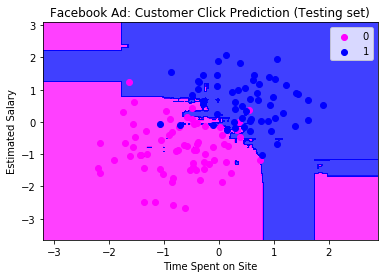

In [315]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rfc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()